In [1]:
if __name__=="__main__":
	import sys
	sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/Scripts')

In [2]:
import numpy as np
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import tifffile as tiff
from src.SMT_Analysis_BP.helpers.Analysis_functions import *
from src.SMT_Analysis_BP.helpers.blob_detection import *
from skimage import io
#import curve_fit 
from scipy.optimize import curve_fit

In [3]:
SAVE = False

In [4]:
#path for the bead data for olympus
path_beads = ["/Users/baljyot/Documents/20230715/0.1um_beads/0.1um_beads_red_green_z_stack_3.tif",
              "/Users/baljyot/Documents/20230715/0.1um_beads/0.1um_beads_red_green_z_stack_6.tif",
              "/Users/baljyot/Documents/20230715/0.1um_beads/0.1um_beads_red_green_z_stack_9.tif"]


Shape of the bead data is:  (15, 672, 720)


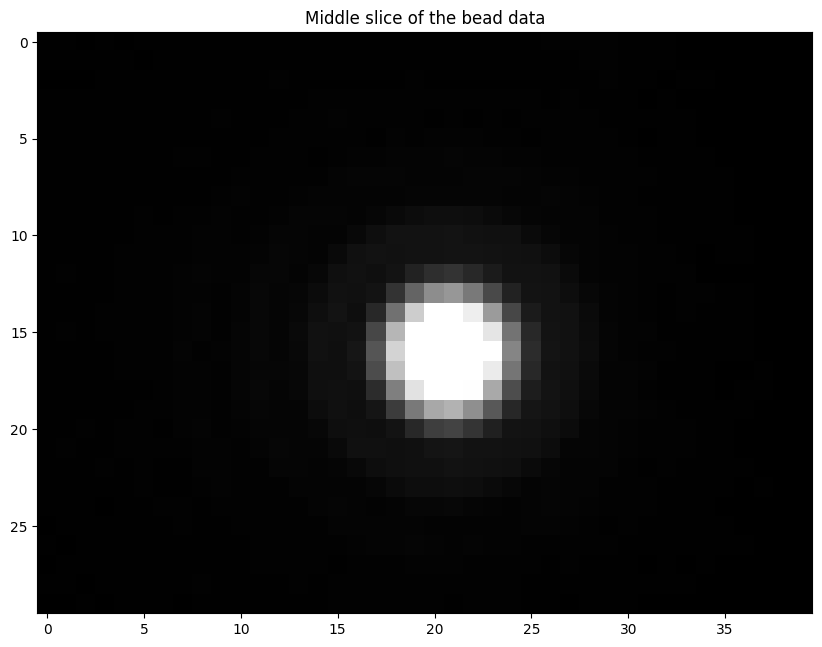

In [5]:
#read the bead data using tifffile
bead_data = []
for i in range(len(path_beads)):
    bead_data.append(tiff.imread(path_beads[i]))

#lets look at the shape of the data
print("Shape of the bead data is: ", bead_data[0].shape)

#plot the middle slice of the bead data
plt.figure(figsize=(10,10))
plt.imshow(bead_data[0][7,630:660,40:80], cmap='gray')
plt.title("Middle slice of the bead data")
plt.show()


0.04
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 19
    # data points      = 196
    # variables        = 6
    chi-square         = 8.0738e+09
    reduced chi-square = 42493513.7
    Akaike info crit   = 3448.61920
    Bayesian info crit = 3468.28789
[[Variables]]
    height:      64114.0000 +/- 2061.12845 (3.21%) (init = 64094)
    centroid_x:  16.0924916 +/- 0.08061452 (0.50%) (init = 16)
    centroid_y:  21.0000000 +/- 0.08185725 (0.39%) (init = 22)
    sigma_x:     2.52014834 +/- 0.10310043 (4.09%) (init = 1.414214)
    sigma_y:     2.55889395 +/- 0.10447349 (4.08%) (init = 1.414214)
    background:  2437.67476 +/- 897.546794 (36.82%) (init = 1441)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.617
    C(sigma_y, background) = -0.614
    C(sigma_x, sigma_y)    = 0.379
    C(height, sigma_y)     = -0.346
    C(height, sigma_x)     = -0.345
None


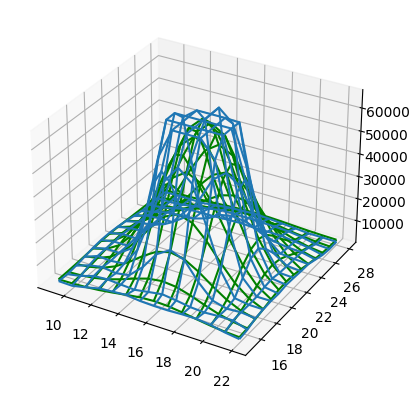

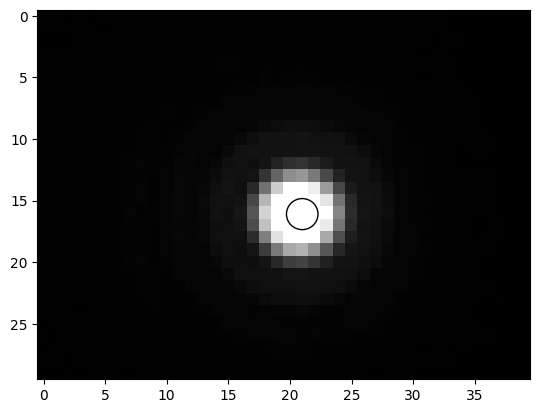

{'Fitted': array([[16.09249156, 21.        ,  3.56402796,  3.61882253]]), 'Scale': array([[16., 22.,  2.]]), 'Fit': [<lmfit.minimizer.MinimizerResult object at 0x15f8b63e0>]}


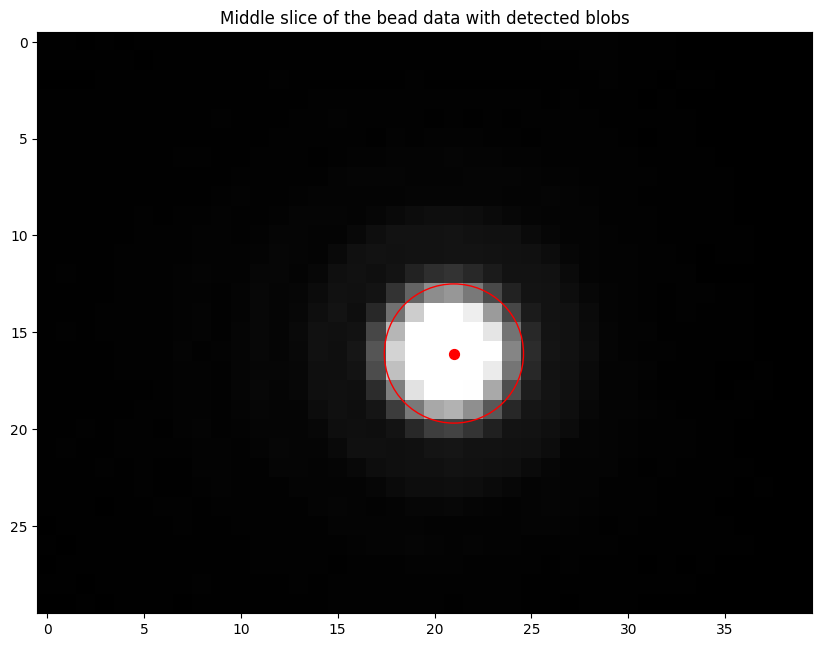

In [6]:
#do the detection 
detection_args = {"median":False,
                "threshold":4e-2, #2.3e-4 for LacI
                "min_sigma":1.1/np.sqrt(2),
                "max_sigma":2./np.sqrt(2),
                "num_sigma":10,
                "overlap":0,
                "logscale":False,
                "verbose":True}
fitting_args = {"mask_size":7,
                "plot_fit":True,
                "fitting_image":"Original",
                "radius_func":None,
                "residual_func":residuals_gaus2d,
                "sigma_range":5,
                "centeroid_range":5,
                "height_range":20}
frame = bead_data[0][7,630:660,40:80]
#find the blobs in the frame
blob_detector = blob_detection(path=frame,**detection_args)
print(blob_detector.threshold)
blob_detector._update_fitting_parameters(kwargs=fitting_args)
#detect blobs
c = blob_detector.detection(type="bp")

print(c)
#plot the image with the detected blobs
plt.figure(figsize=(10,10))
plt.imshow(frame, cmap='gray')
for i in c["Fitted"]:
    plt.scatter(i[1],i[0], c='r', s=50)
    #make a circle
    circle = plt.Circle((i[1],i[0]), np.mean([i[2],i[3]]), color='r', fill=False)
    plt.gcf().gca().add_artist(circle)
plt.title("Middle slice of the bead data with detected blobs")
plt.show()


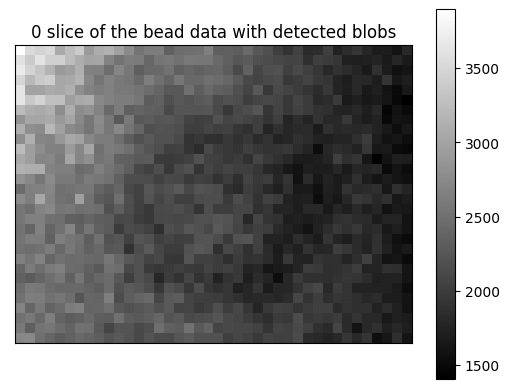

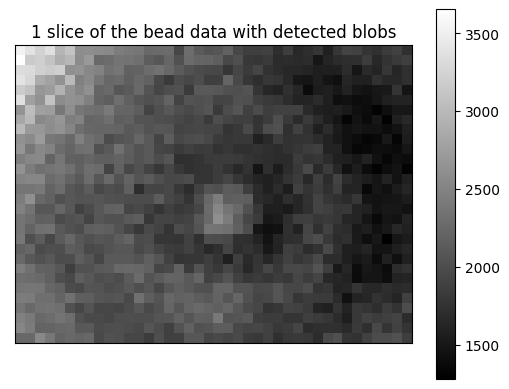

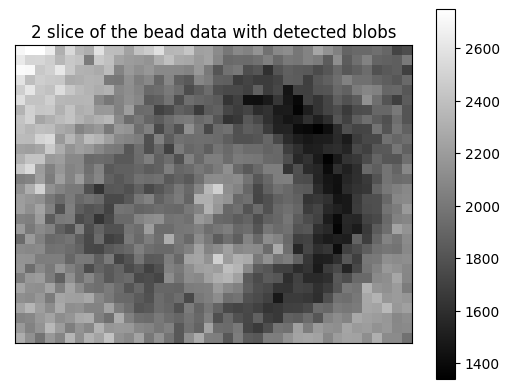

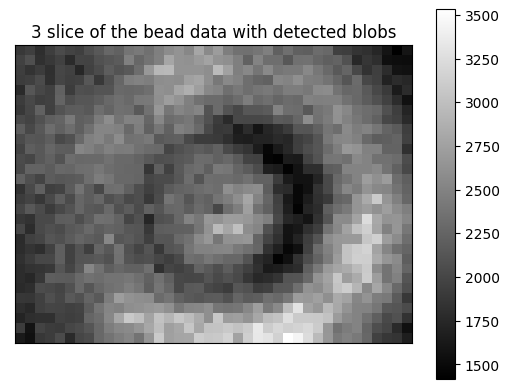

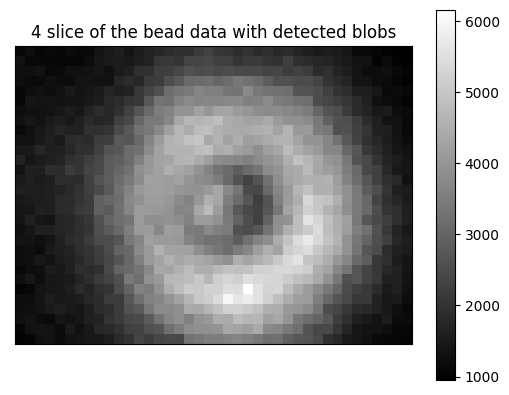

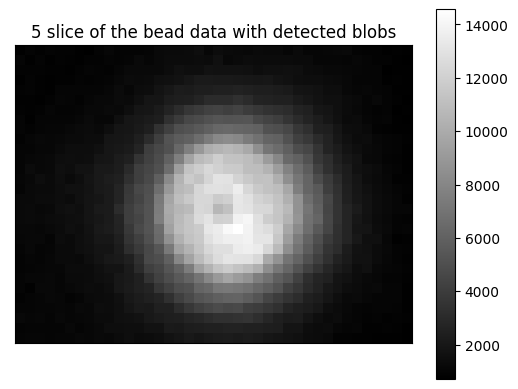

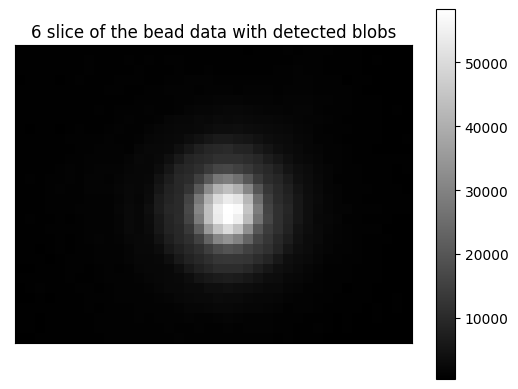

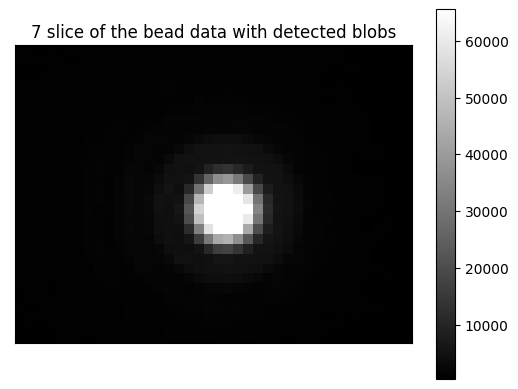

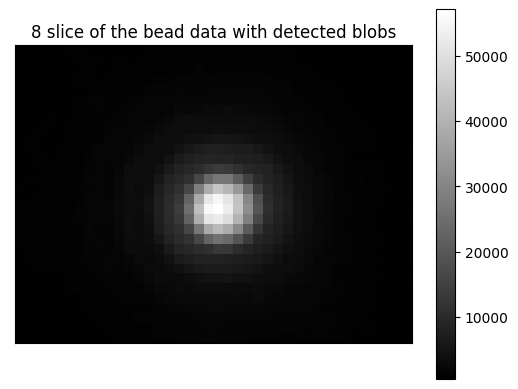

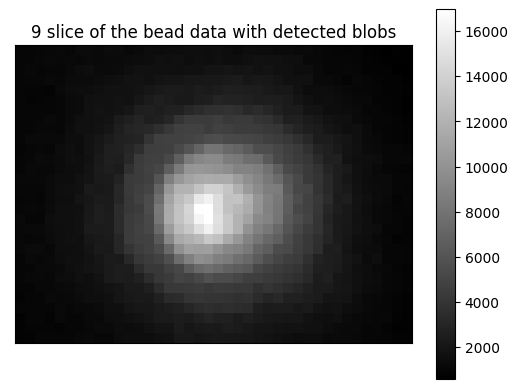

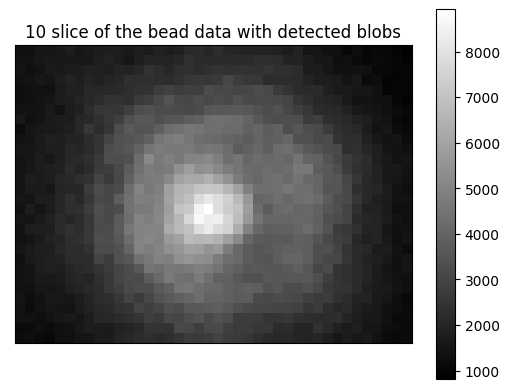

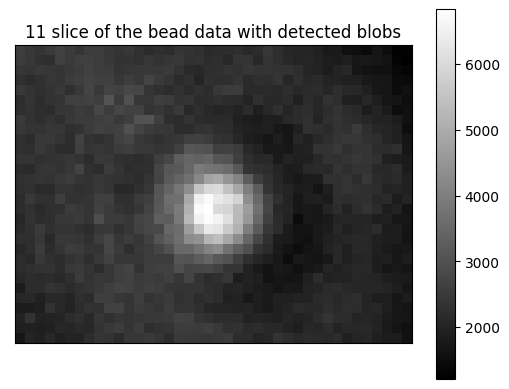

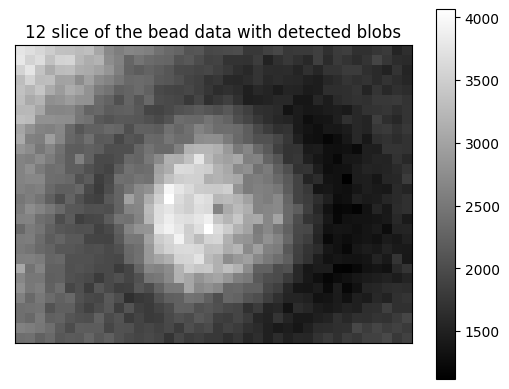

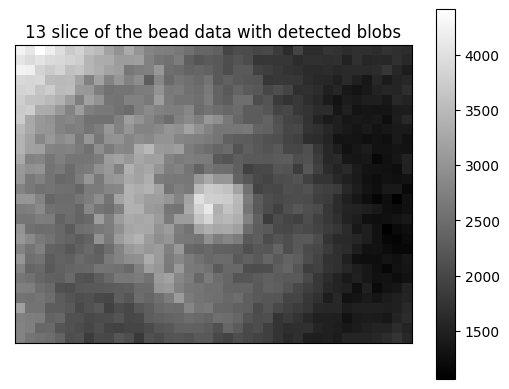

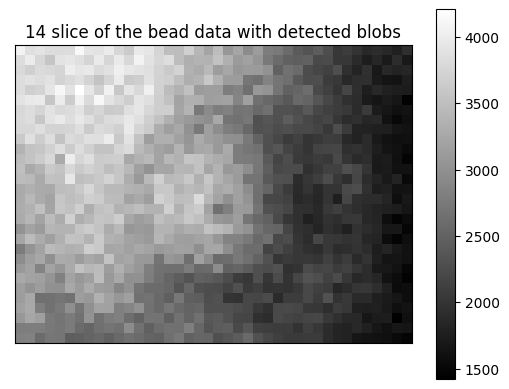

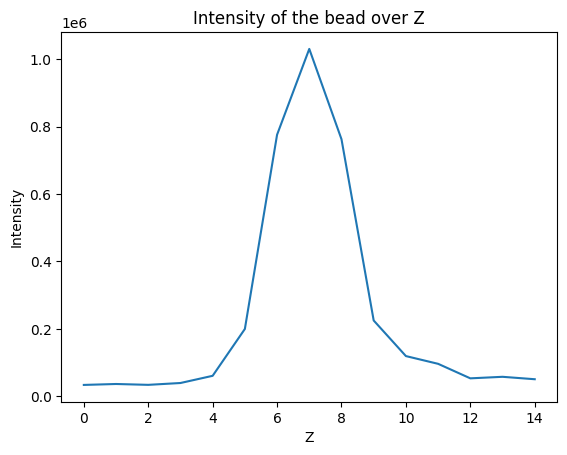

In [7]:
intensity = []

for i in range(len(bead_data[0])):
    #plot the image with the detected blobs
    plt.imshow(bead_data[0][i,630:660,40:80], cmap='gray')
    for j in c["Fitted"]:
        #plt.scatter(j[1],j[0], c='r', s=50)
        #make a circle
        circle = plt.Circle((j[1],j[0]), np.mean([j[2],j[3]]), color='r', fill=False)
        #plt.gcf().gca().add_artist(circle)
    plt.title("{0} slice of the bead data with detected blobs".format(i))
    plt.colorbar()
    #remove the ticks
    plt.xticks([])
    plt.yticks([])
    #save each to "/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_1/Beads_Confocal_0.1um/XY_PLOTS/"
    #make sure to make this directory
    if not os.path.exists("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_1/Beads_Confocal_0.1um/XY_PLOTS/"):
        os.makedirs("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_1/Beads_Confocal_0.1um/XY_PLOTS/")
    if SAVE == True:
        plt.savefig("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_1/Beads_Confocal_0.1um/XY_PLOTS/XY_Z={0}.svg".format(i), format='svg', dpi=200)
    plt.show()
    #get the intensity at the center of the blob for each frame
    intensity_4x4 = bead_data[0][i,630:660,40:80][int(j[0])-2:int(j[0])+2,int(j[1])-2:int(j[1])+2]
    intensity.append(intensity_4x4.sum())

    
plt.plot(range(len(bead_data[0])), intensity)
plt.title("Intensity of the bead over Z")
plt.xlabel("Z")
plt.ylabel("Intensity")
plt.show()






[ 1.02103978e+06  1.80863361e-03 -3.33367436e-01  4.87095828e+04]


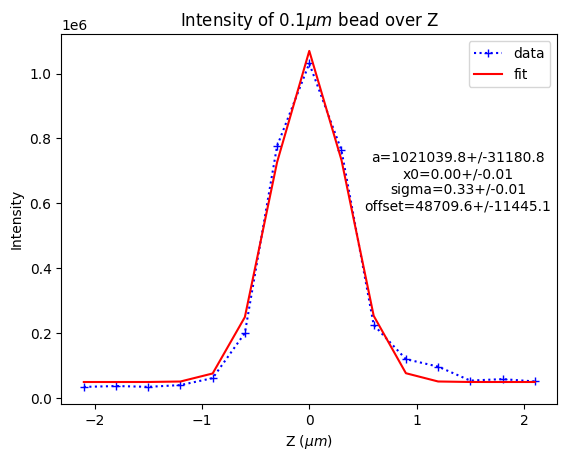

In [27]:
#fit the intensity over Z to a gaussian
def gaussian(x, a, x0, sigma, offset):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + offset
#Z = len(bead_data[0]) save for testing
#voxel depth is 0.28 microns
voxel_depth = 0.28
Z = np.linspace(-voxel_depth*len(bead_data[0])/2, voxel_depth*len(bead_data[0])/2, len(bead_data[0]))
popt, pcov = curve_fit(gaussian, Z, intensity, p0=[1, 0, 1, 0])
print(popt)
plt.plot(Z, intensity, 'b+:', label='data')
plt.plot(Z, gaussian(Z, *popt), 'r-', label='fit')
plt.legend()
plt.title(r"Intensity of $0.1\mu m$ bead over Z")
plt.xlabel(r"Z $(\mu m)$")
plt.ylabel("Intensity")
#print the fit parameters on the plot in a nice way with the errors
plt.text(0.8, 0.6, "a={0:.1f}+/-{1:.1f}\nx0={2:.2f}+/-{3:.2f}\nsigma={4:.2f}+/-{5:.2f}\noffset={6:.1f}+/-{7:.1f}".format(popt[0], np.sqrt(pcov[0,0]), popt[1], np.sqrt(pcov[1,1]), np.abs(popt[2]), np.sqrt(pcov[2,2]), popt[3], np.sqrt(pcov[3,3])), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
#save it to the folder /Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_1/Beads_Confocal_0.1um
SAVE = False
if SAVE == True:
    plt.savefig("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_1/Beads_Confocal_0.1um/Intensity_Fit_Z.svg", format='svg', dpi=200)
plt.show()





In [9]:
#lets try to do the first few parts of the sim 
import src.SMT_Analysis_BP.helpers.fbm_utility as fbm_utility
import src.SMT_Analysis_BP.helpers.simulate_foci as simulate_foci
import src.SMT_Analysis_BP.helpers.simulate_cells as simulate_cells
import src.SMT_Analysis_BP.helpers.SMT_converters as smt
initial_dict = {
    "initial_centers":np.array([[100,100],[90,95]]),
    "initial_scale": np.array([2,2]),
    "diffusion_coefficient": np.array([1e-4,1e-4]),
    "hurst_exponent": np.array([0.2,0.2])  
}
cell_parms = {
    "diffusion_coefficients":np.array(list(0.45*np.ones(500))),
    "initials": initial_dict,
    "num_tracks":500,
    "track_type":"fbm",
    "hursts":np.array(list(0.2*np.ones(500))),
    "dims":(200,200),
    "movie_frames":500,
    "cell_space":np.array([80,120,90,105])
}     
global_sim_params = {
    "track_length_mean":5,
    "track_distribution":"exponential",
    "exposure_time":20,#ms same as frame_time
    "base_noise":140,
    "point_intensity":20,
    "psf_sigma":1.,
    "frame_time":20,#ms
    "pixel_size":130,
    "axial_function":"exponential",
    "density_dif": 5
}

cell_sim = simulate_cells.Simulate_cells(cell_parms,global_sim_params)
a = cell_sim.get_cell()

2023-08-02 04:14:43.316044: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-02 04:14:43.316426: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



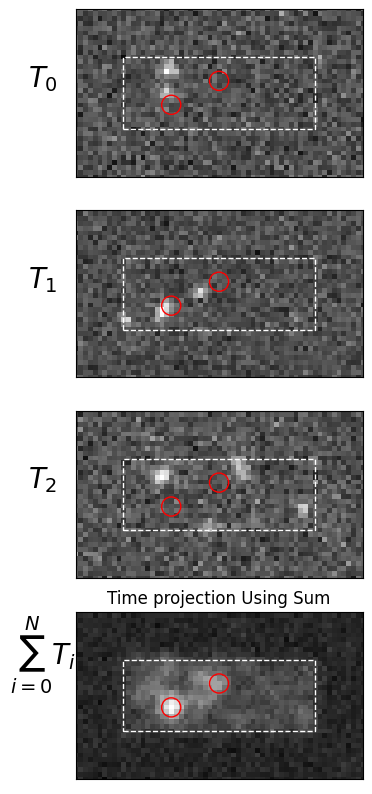

In [10]:
#plot the map of the cell with one frame = 104
fig = plt.figure(figsize=(10,10))
#add the axes
ax = fig.add_subplot(411)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax.add_artist(rect)

#plot the foci as a circle with center and radius defined by the initial centers and scale
for i in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][i][0],initial_dict["initial_centers"][i][1]), initial_dict["initial_scale"][i], color='r', fill=False, linestyle='-')
    ax.add_artist(circle)
    


ax.imshow(a["map"][200],cmap = 'gray')
#only show the cell space and some extra space around it
ax.set_xlim(cell_parms["cell_space"][0]-10,cell_parms["cell_space"][1]+10)
ax.set_ylim(cell_parms["cell_space"][2]-10,cell_parms["cell_space"][3]+10)

#make 2 more subplots below this one and repeat but with other frames like 300, 400
ax2 = fig.add_subplot(412)
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax2.add_artist(rect)
for i in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][i][0],initial_dict["initial_centers"][i][1]), initial_dict["initial_scale"][i], color='r', fill=False, linestyle='-')
    ax2.add_artist(circle)
ax2.imshow(a["map"][300],cmap = 'gray')
ax2.set_xlim(cell_parms["cell_space"][0]-10,cell_parms["cell_space"][1]+10)
ax2.set_ylim(cell_parms["cell_space"][2]-10,cell_parms["cell_space"][3]+10)

ax3 = fig.add_subplot(413)
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax3.add_artist(rect)
for i in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][i][0],initial_dict["initial_centers"][i][1]), initial_dict["initial_scale"][i], color='r', fill=False, linestyle='-')
    ax3.add_artist(circle)
ax3.imshow(a["map"][400],cmap = 'gray')
ax3.set_xlim(cell_parms["cell_space"][0]-10,cell_parms["cell_space"][1]+10)
ax3.set_ylim(cell_parms["cell_space"][2]-10,cell_parms["cell_space"][3]+10)


ax4 = fig.add_subplot(414)
ax4.imshow(a["map"].sum(axis=0), cmap='gray')

#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax4.add_artist(rect)

#plot the foci as a circle with center and radius defined by the initial centers and scale
for i in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][i][0],initial_dict["initial_centers"][i][1]), initial_dict["initial_scale"][i], color='r', fill=False, linestyle='-')
    ax4.add_artist(circle)
plt.title("Time projection Using Sum")
#only show the cell space and some extra space around it
ax4.set_xlim(cell_parms["cell_space"][0]-10,cell_parms["cell_space"][1]+10)
ax4.set_ylim(cell_parms["cell_space"][2]-10,cell_parms["cell_space"][3]+10)

#remove ticks and make the figure compact 
ax.set_xticks([])
ax.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])

#for the first 3 subplots label the y axis with the "T_{0}" and "T_{1}" and "T_{2}" in latex
ax.set_ylabel(r"$T_{0}$", rotation=0, labelpad=20, fontsize=20)
ax2.set_ylabel(r"$T_{1}$", rotation=0, labelpad=20, fontsize=20)
ax3.set_ylabel(r"$T_{2}$", rotation=0, labelpad=20, fontsize=20)
#for the last label as Sum T_{N}
ax4.set_ylabel(r"$\sum_{i=0}^{N}T_{i}$", rotation=0, labelpad=20, fontsize=20)


# #on the left side outside the plot have an arrow pointing downwards with the text Time
# ax.annotate("Time", xy=(-0.12, -0.5), xycoords="axes fraction", xytext=(-0.1, 0.5), textcoords="axes fraction", arrowprops=dict(arrowstyle="->"), va="center", ha="center", fontsize=20)
if SAVE == True:
    plt.savefig("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_1/Generic_Time_Projection_Sum/Time_Projection.svg", format='svg', dpi=200)
plt.show()
